In order to successfully complete this assignment you need to commit a report in markdown or ipynb format to your ```Reports``` directory in your project git repository on or before **11:59pm on Friday September 18**.

# <center>Using Optimization in Accelerator Physics</center>

<center>by Kelly Anderson</center>

Optimization in accelerator physics comes in many different forms depending on what effects you are looking for. There are various multipole magnets and cavities found along an accelerator for the purpose of bending and accelerating the particles. A collection of components in an accelerator is referred to as a lattice. One of the most common lattices used is called a FODO lattice. This lattice consists of a focusing quadrupole, drift space (open), a defocusing quadrupole, and another drift space. This lattice has the ultimate effect of focusing a group of charged particles. 

Using a defocusing quadrupole may seem counter productive but it is needed. When we talk about the position in an accelerator we refer to the translational components, x and y, and the longitudinal component, s. The longitudinal component is the direction along the accelerator. The reason this defocusing quadrupole is needed is because a quadrupole will only focus one translational component and defocus the other. This will still have a focusing effect because the particles farther from the center of the magnet will be bent more. A component that doesn't have this defocusing effect, like a dipole, does not have strong enough focusing for higher energy.

Even looking at just this simple lattice can be optimized. If you assume the length of the magnets is relatively short you can actually treat the quadrupoles as optical lenses. If the accelerator is a ring then you might want the particles to be in the same position at the beginning and end of the ring so they form a closed orbit. This could be for storage of particles or light sources that use synchrotron radiation. If we assume a one dimensional system and a single FODO cell as our entire ring (usually an accelerator will have multiple and we will ignore the small error effects of dipoles in this case) we can treat each component as a matrix as shown.

\begin{equation}
    M = M_n M_{n-1}...M_2 M_1
\end{equation}

\begin{equation}\begin{pmatrix}
    x \\
    x'
\end{pmatrix}_{s_o+l} = M(s_o+l|s_o)
\begin{pmatrix}
    x \\
    x'
\end{pmatrix}_{s_o}\end{equation}

The matrix for each component can be multiplied together to get a single matrix for a whole ring. Because our system has constant energy, phase space area is conserved which will mean the determinant of the matrix is 1. By looking at the eigenvalues and making sure our results stay finite as you do infinite passes through the ring, we can also determine that the trace of the matrix must be less than 2.

\begin{equation}    \begin{pmatrix}
    x \\
    x'
    \end{pmatrix}_{s_o+nl}
    = [M(s_o+l|s_o)]^n
    \begin{pmatrix}
    x \\
    x'
    \end{pmatrix}_{s_o}
    = A_1 \lambda_1^n \mathbf{v}_1+A_2 \lambda_2^n \mathbf{v}_2
\end{equation}

\begin{equation}
\det(M)=1
\end{equation}
\begin{equation}
\det(M)=1=\lambda_1 \lambda_2
\end{equation}

\begin{equation}
    \lambda_2 = 1/\lambda_1
\end{equation}

\begin{equation}
    |\lambda_1| = |\lambda_2|=1
\end{equation}
\begin{equation}
    \lambda_1 = e^{i\mu}
\end{equation}
\begin{equation}
    \lambda_2 = e^{-i\mu}
\end{equation}

\begin{equation}
    TrM = \lambda_1 + \lambda_2 = e^{i\mu}+e^{-i\mu}=2\cos{\mu}
\end{equation}
\begin{equation}
    |TrM|\leq2
\end{equation}

Below is the matrix for a FODO cell where L is the drift length and f is the focal length. There is also a common transformation of variables used in accelerators called twiss parameters. Without too much detail, the beta function corresponds to the amplitude of the position argument and shown is how to convert the x, x’ matrix into a twiss one.

\begin{equation}
    M =
    \begin{pmatrix}
    1 && 0 \\ -\frac{1}{2f} && 1
    \end{pmatrix}
    \begin{pmatrix}
    1 && L \\ 0 && 1
    \end{pmatrix}
    \begin{pmatrix}
    1 && 0 \\ \frac{1}{f} && 1
    \end{pmatrix}
    \begin{pmatrix}
    1 && L \\ 0 && 1
    \end{pmatrix}
    \begin{pmatrix}
    1 && 0 \\ -\frac{1}{2f} && 1
    \end{pmatrix}
\end{equation}

\begin{equation}
    =
    \begin{pmatrix}
    1 - \frac{L^2}{2f^2} && 2L(1+\frac{L}{2f}) \\ -\frac{L}{2f}(1-\frac{L}{2f}) && 1 - \frac{L^2}{2f^2}
    \end{pmatrix}
\end{equation}

\begin{equation}
    \begin{pmatrix}
    \beta \\ \alpha \\ \gamma
    \end{pmatrix}_{s_2}
    =
    \begin{pmatrix}
    M_{11}^2 && -2 M_{11} M_{12} && M_{12}^2 \\
    -M_{11} M_{21} && M_{11} M_{22} + M_{12} M_{21} && -M_{12} M_{22} \\
    M_{21}^2 && -2 M_{21} M_{22} && M_{22}^2
    \end{pmatrix}
    \begin{pmatrix}
    \beta \\ \alpha \\ \gamma
    \end{pmatrix}_{s_1}
\end{equation}

Using the previous condition we can optimize the length and focal distance to ensure a stable orbit.

\begin{equation}
    \frac{1}{2}|TrM| = |1-\frac{L^2}{2f^2}| \leq 1
\end{equation}

\begin{equation}
    |\frac{L^2}{f^2}| \leq 4
\end{equation}

Here is a program that shows what happens if that condition is not met.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import linalg as LA
from matplotlib.pyplot import figure

In [2]:
class FODO(object):
    def __init__(self, drift, focal):
        self.L = drift
        self.f = focal
        
        self.M = np.zeros((2,2))

        self.M[0,0] = 1 - self.L**2/(2*(self.f**2))
        self.M[1,0] = 2*self.L*(1+self.L/(2*self.f))
        self.M[0,1] = (-self.L/(2*self.f**2))*(1-self.L/(2*self.f))
        self.M[1,1] = 1 - self.L**2/(2*(self.f**2))

        self.FODO=np.zeros((3,3))
        self.FODO[0,0] = self.M[0,0]**2
        self.FODO[1,0] =-2*self.M[0,0]*self.M[1,0]
        self.FODO[2,0] = self.M[1,0]**2
        self.FODO[0,1] = -self.M[0,0]*self.M[0,1]
        self.FODO[1,1] = self.M[0,0]*self.M[1,1]+self.M[1,0]*self.M[0,1]
        self.FODO[2,1] = -self.M[1,0]*self.M[1,1]
        self.FODO[0,2] = self.M[0,1]**2
        self.FODO[1,2] = -2*self.M[0,1]*self.M[1,1]
        self.FODO[2,2] = self.M[1,1]**2
    
    def __call__(self, x0, xp0, N):
        X=np.zeros((3,1))
        X_o=np.zeros((3,1))
        X_o[0,0] = x0
        X_o[1,0] = xp0
        X_o[2,0] = (1 + X_o[1,0]**2)/X_o[0,0]
        beta_o = X_o[0,0]
        alpha_o = X_o[1,0]

        beta_array = [X_o[0]]
        S = [0]

        for i in range(1,N):
            X = np.matmul(self.FODO,X_o)
            beta_array.append(X[0,0])
            X_o = X
            S.append(2*self.L*i)
        
        return(beta_o, alpha_o, S,beta_array)

Initial Conditions: beta_0 = 0.0025[m], alpha_o = 0.0
L = 1[m] f = 15[m] N = 250
|TrM| = 1.9955555555555555


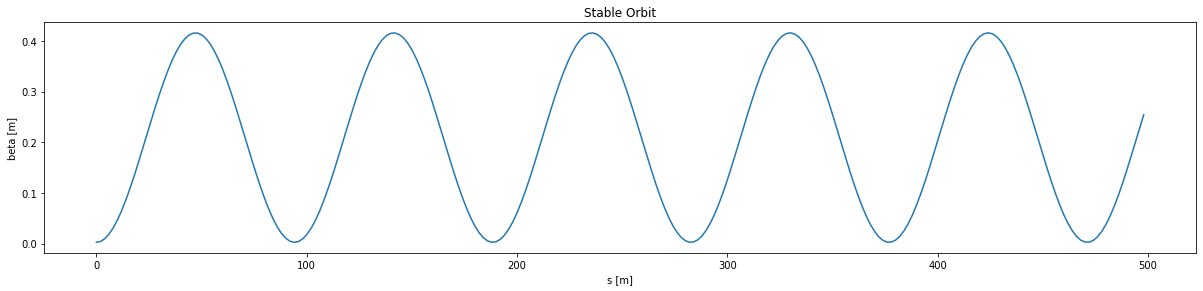

In [8]:
N_s = 250
L_s = 1
f_s = 15*L_s
N_u = 5
L_u = 1
f_u = np.sqrt(L_u**2/(4+1E-9))
x0 = 0.25E-2
xp0 = 0

FODO_unstable = FODO(L_u, f_u)
FODO_stable = FODO(L_s, f_s)

beta0_u, alpha0_u, S_u, beta_u = FODO_unstable(x0, xp0, N_u)
beta0_s, alpha0_s, S_s, beta_s = FODO_stable(x0, xp0, N_s)
    
print("Initial Conditions: beta_0 = " + str(beta0_s) + "[m], alpha_o = " + str(alpha0_s))
print("L = " + str(L_s) + "[m] f = " + str(f_s) + "[m]" + " N = " + str(N_s))
print("|TrM| = " + str(abs(FODO_stable.M[0,0] + FODO_stable.M[1,1])))
fig = plt.figure(figsize=(20,4))
grph = fig.add_axes([0.1,0.1,0.8,0.8])
grph.plot(S_s,beta_s)
plt.title("Stable Orbit")
plt.xlabel("s [m]")
plt.ylabel("beta [m]")
plt.show()

Initial Conditions: beta_0 = 0.0025[m], alpha_o = 0.0
L = 1[m] f = 0.4999999999375[m] N = 5
|TrM| = 2.000000001


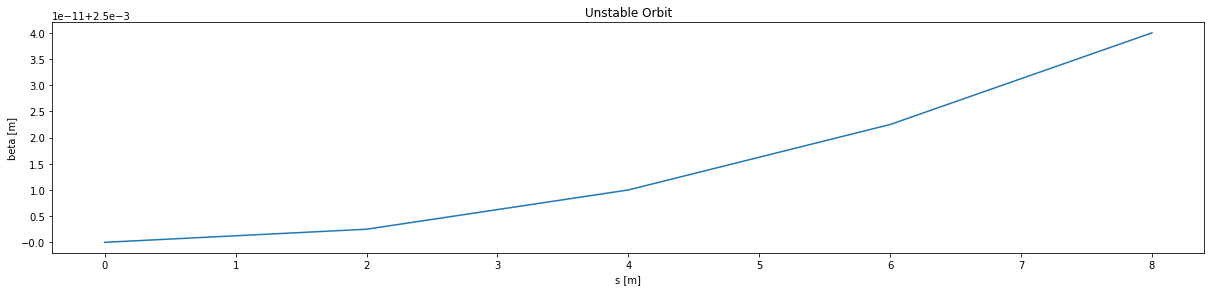

In [9]:
print("Initial Conditions: beta_0 = " + str(beta0_u) + "[m], alpha_o = " + str(alpha0_u))
print("L = " + str(L_u) + "[m] f = " + str(f_u) + "[m]" + " N = " + str(N_u))
print("|TrM| = " + str(abs(FODO_unstable.M[0,0] + FODO_unstable.M[1,1])))
fig = plt.figure(figsize=(20,4))
grph = fig.add_axes([0.1,0.1,0.8,0.8])
grph.plot(S_u,beta_u)
plt.title("Unstable Orbit")
plt.xlabel("s [m]")
plt.ylabel("beta [m]")
plt.show()

Another example of optimization is with a more sophisticated lattice code called madx. This program allows one to put in components without the approximations we used before. It is used in accelerator physics to design and test lattices. Below is an example of a series of FODO cells in a ring. Small random errors are introduced to the alignment of the quadrupoles, like in real accelerators. Using dipoles placed after them call kickers, the program will automatically optimize the strength of these components to try and stabilize the x and y oscillations

```
circum=1000.0;
// circumfrance of ring;
lquad=3.0;
// length of quad;
ldi=5.0;
// length of dipole;
lbpm=0.0001;
// length of beam position monitor;
lcor = lbpm;
// lenght of corrector magnet;
ncell=20;
// number of cells in a ring;
lcell=circum/ncell;
// length of every cell;
ndc = 2;
// number of dipoles per cell;
nfqc = 1;
//number of focusing quads per cell;
ndqc = 1:
//number of defocusing quads per cell;
ndr1c = nqc;
// number of drift ones per cell;
ndr2c = ndr1c;
// numver of drift twos per cell;
ldrifthalf = (lcell - (nfqc+ndqc)*lquad - ndc*ldi - nfqc*(lbpm + lcor) - ndqc*(lbpm+lcor))/ndr1c;
// length of drift space per cell divided by the number of drift cells to account for 2 per quadropole;
fdrift1 = 0.5;
// % of drift space that is drift1;
ldrift1 = fdrift1*ldrifthalf;
// lenght of drift one;
ldrift2 = ldrifthalf - ldrift1;
// length of drift two;
fq=14.957;
// focal enght of quads;
k_1 = 1/(lquad*fq);
// k_1 for quads;

QF: QUADRUPOLE, L=lquad, K1=k_1, THICK=true;
QD: QUADRUPOLE, L=lquad, K1=-k_1, THICK=true;
DP: SBEND, L=ldi, ANGLE=(2*pi)/(ndc*ncell);
Dr1: DRIFT, L=ldrift1;
Dr2: DRIFT, L=ldrift2;
BPM: MONITOR, L=lbpm;
CH: HKICKER, L=lcor;
CV: VKICKER, L=lcor;

FODO: line=(QF,CH,BPM,Dr1,DP,Dr2,QD,CV,BPM,Dr2,DP,Dr1);
RING: line=20*(FODO);

return;
```

```
call, file='./Exercise_2/exercise_2.lat';
option, -echo;

Beam, particle = proton, energy=20.0;

use, sequence=RING;
eoption,seed=123456789,add=false;
select,flag=error,range=#S/#E,class=quadrupole;
ealign, dx:=tgauss(3.0)*1.0e-4, dy:=tgauss(3.0)*2.0e-4;

select, flag=twiss,column=name,s,x,y, dx, dy;

twiss,centre;

plot, haxis=s,vaxis=x,y, title="Position Pre Correction", file="./Exercise_2/ex2_xy_plot", colour=100.0;

coption,print=3;
correct,sequence=RING,flag=ring,mode=micado,plane=x,error=1e-6,ncorr=20,clist="./Exercise_2/ex2_xcor.txt",mlist="./Exercise_2/ex2_xbpm.txt";
correct,sequence=RING,flag=ring,mode=micado,plane=y,error=1e-6,ncorr=20,clist="./Exercise_2/ex2_ycor.txt",mlist="./Exercise_2/ex2_ybpm.txt";

twiss, centre;
plot, haxis=s,vaxis=x,y, title="Position Post Correction", colour=100.0;
stop;
```

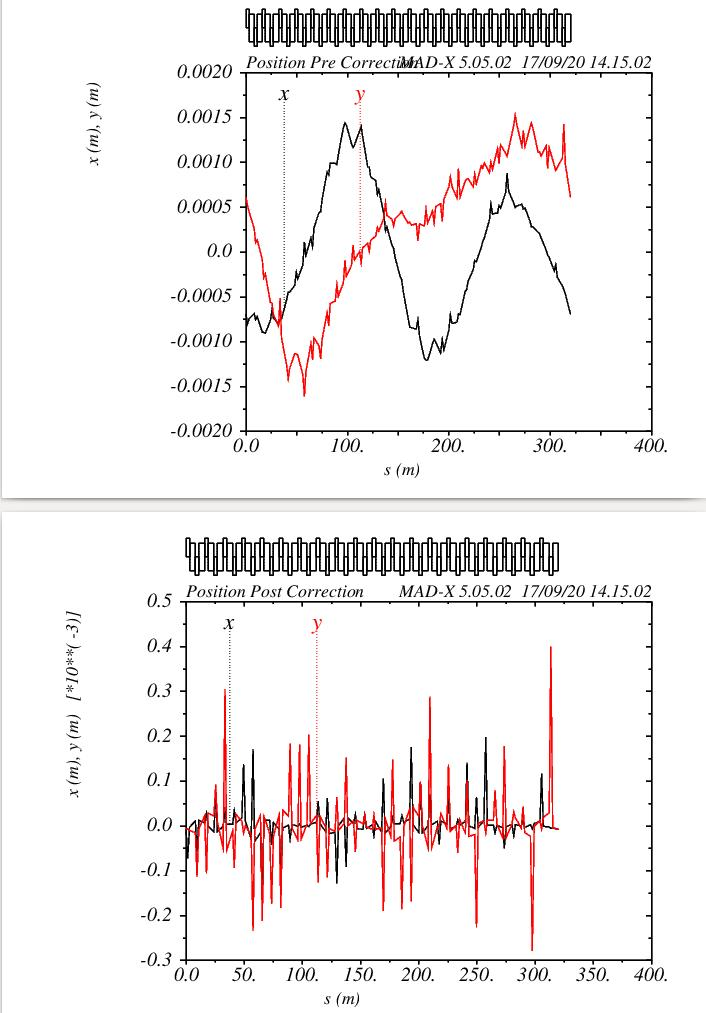

---
# References

S. Y. Lee, Accelerator Physics, 4th Edition

D. A. Edwards, M. J. Syphers, An Introduction to the Physics of High Energy Accelerators

The beta funciton code was adapted from a code I wrote for a demonstration in a class Fall 2019.

The madx code is from what I wrote as an exercise working for Dr. Yue Hao.